In [7]:
import sys, os

## Include previous level directories to the module import path
sys.path.insert(0, os.path.abspath(os.path.join("..")))

import numpy as np
import argparse

from lyaemu import gp_wrap as lk

from cobaya.yaml import yaml_load_file
import arviz as az

# Export the results to GetDist
from getdist.mcsamples import loadMCSamples
import getdist.plots as gdplt


from matplotlib import pyplot as plt
import matplotlib

from lyaemu.priya_explorer import PRIYAEmulatorExplorer

Cut at kmax 9


In [8]:
import h5py

with h5py.File(
    "../Emulator_Files_KS/hires/mf_emulator_flux_vectors_tau1000000_cut.hdf5", "r"
) as file:
    print(file.keys())

    flux_vectors = file["flux_vectors"][:]
    kfkms = file["kfkms"][:]
    kfmpc = file["kfmpc"][:]
    zout = file["zout"][:]
    params = file["params"][:]

param_names = {
    "tau0": 0,
    "ns": 1,
    "Ap": 2,
    "herei": 3,
    "heref": 4,
    "alphaq": 5,
    "hub": 6,
    "omegamh2": 7,
    "hireionz": 8,
    "bhfeedback": 9,
}

print("kmax:", kfmpc.max())
flux_vectors.shape, kfkms.shape, flux_vectors.shape, zout.shape, params.shape

<KeysViewHDF5 ['flux_vectors', 'kfkms', 'kfmpc', 'params', 'zout']>
kmax: 9.00589894029074


((30, 2236), (30, 13, 172), (30, 2236), (13,), (30, 10))

No cut, kamx = 17.2


In [2]:
import h5py


with h5py.File(
    "../Emulator_Files_KS/mf_emulator_flux_vectors_tau1000000.hdf5", "r"
) as file:
    print(file.keys())

    flux_vectors = file["flux_vectors"][:]
    kfkms = file["kfkms"][:]
    kfmpc = file["kfmpc"][:]
    zout = file["zout"][:]
    params = file["params"][:]

param_names = {
    "tau0": 0,
    "ns": 1,
    "Ap": 2,
    "herei": 3,
    "heref": 4,
    "alphaq": 5,
    "hub": 6,
    "omegamh2": 7,
    "hireionz": 8,
    "bhfeedback": 9,
}

print("kmax:", kfmpc.max())
flux_vectors.shape, kfkms.shape, flux_vectors.shape, zout.shape, params.shape

<KeysViewHDF5 ['flux_vectors', 'kfkms', 'kfmpc', 'params', 'zout']>
kmax: 17.226399717184034


((600, 4277), (600, 13, 329), (600, 4277), (13,), (600, 10))

hires file, no cut


In [6]:
import h5py


with h5py.File(
    "../Emulator_Files_KS/hires/mf_emulator_flux_vectors_tau1000000.hdf5", "r"
) as file:
    print(file.keys())

    flux_vectors = file["flux_vectors"][:]
    kfkms = file["kfkms"][:]
    kfmpc = file["kfmpc"][:]
    zout = file["zout"][:]
    params = file["params"][:]

param_names = {
    "tau0": 0,
    "ns": 1,
    "Ap": 2,
    "herei": 3,
    "heref": 4,
    "alphaq": 5,
    "hub": 6,
    "omegamh2": 7,
    "hireionz": 8,
    "bhfeedback": 9,
}

print("kmax:", kfmpc.max())
flux_vectors.shape, kfkms.shape, flux_vectors.shape, zout.shape, params.shape

<KeysViewHDF5 ['flux_vectors', 'kfkms', 'kfmpc', 'params', 'zout']>
kmax: 17.226399717184034


((30, 4277), (30, 13, 329), (30, 4277), (13,), (30, 10))

In [3]:
# 0 sim 0 z bin
print(kfkms[0, 0, :].min(), kfkms[0, 0, :].max())
# 0 sim 1 z bin
print(kfkms[0, 1, :].min(), kfkms[0, 1, :].max())
# 61 sim 12 z bin
print(kfkms[61, 12, :].min(), kfkms[61, 12, :].max())

0.0003865927411592488 0.12718901184139286
0.00039342028501791786 0.12943527377089498
0.0005002628607195388 0.16458648117672828


In [4]:
%matplotlib inline

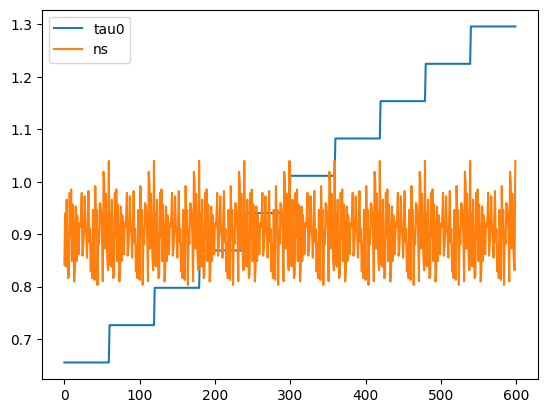

In [5]:
plt.plot(params[:, 0], label="tau0")
plt.plot(params[:, 1], label="ns")
plt.legend()
plt.show()